In [17]:
import numpy as np
import sklearn
import scipy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools

In [18]:
np.random.seed(seed=1)
BASE_SAMPLES = 10000
SCALE = 100
ANOMALY_LOC = 700
ANOMALY_SCALE = 30
ANOMALY_SIZE = 1000

In [19]:
xys = []

In [20]:
# 平坦 0
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
y = np.ceil(y)
xys.append([x, y])

In [21]:
# 全体的に傾向あり+方向 1
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
y = np.ceil(y)
xys.append([x, y])

In [22]:
# 平坦 + 異常 2
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
x = np.append(x, np.random.normal(loc=2.0, scale=0.5, size=ANOMALY_SIZE))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=ANOMALY_SIZE))
y = np.ceil(y)
xys.append([x, y])

In [23]:
# 全体傾向あり + 異常 3
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
x = np.append(x, np.random.normal(loc=2.0, scale=0.5, size=ANOMALY_SIZE))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=ANOMALY_SIZE))
y = np.ceil(y)
xys.append([x, y])

In [24]:
# 平坦 + 平坦異常 相関低い 4
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES)
x = np.append(x, np.random.normal(loc=0, scale=1, size=ANOMALY_SIZE))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=ANOMALY_SIZE))
y = np.ceil(y)
xys.append([x, y])

In [25]:
# 全体傾向あり + 逆異常 相関低い 5
y = np.random.exponential(SCALE, BASE_SAMPLES)
x = np.random.normal(loc=0, scale=1, size=BASE_SAMPLES) + (y/(BASE_SAMPLES/20))
x = np.append(x, np.random.normal(loc=-2.0, scale=0.5, size=ANOMALY_SIZE))
y = np.append(y, np.random.normal(loc=ANOMALY_LOC, scale=ANOMALY_SCALE, size=ANOMALY_SIZE))
y = np.ceil(y)
xys.append([x, y])

In [29]:
def draw_graph(x, y):
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y)
    plt.scatter(x, y)
    plt.show()

    plt.scatter(x, y)
    a = lr.coef_
    r2 = lr.score(x.reshape(-1,1), y)
    print(f"決定係数: {r2:.4f}")
    print(f"傾き: {a[0]}")
    print(f"決定係数*傾き: {r2*a[0]:.4f}")
    b = lr.intercept_
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = x_min*a + b
    y_max = x_max*a + b
    ylim = plt.gca().get_ylim()
    plt.plot([x_min, x_max], [y_min, y_max], c='red')
    plt.ylim(ylim)
    plt.show()

    plt.hist(y)
    plt.show()

0


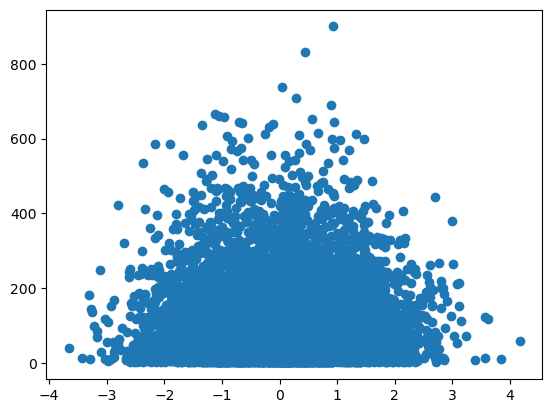

決定係数: 0.0000
傾き: -0.31628252672351237
決定係数*傾き: -0.0000


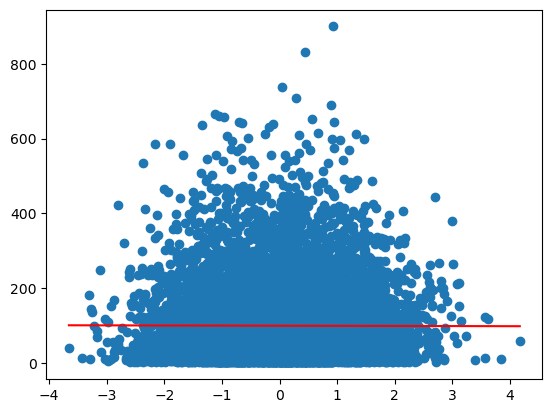

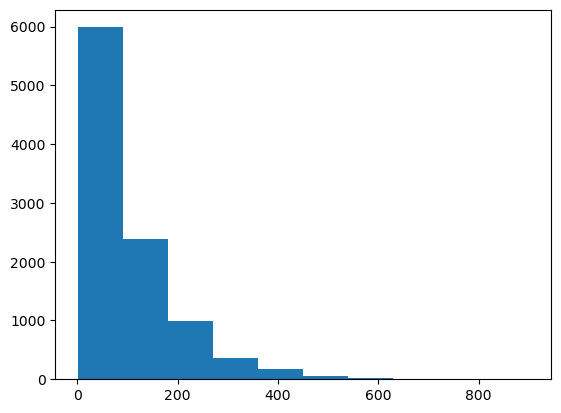

1


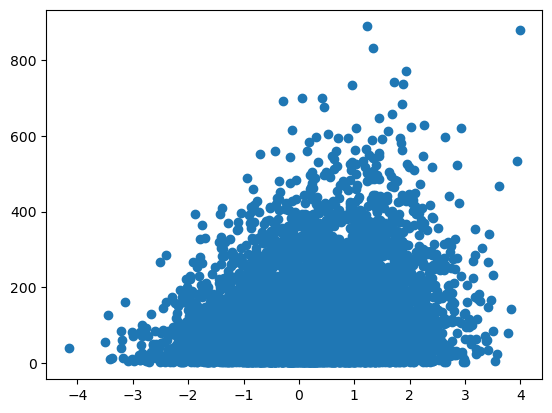

決定係数: 0.0408
傾き: 19.76729631796373
決定係数*傾き: 0.8059


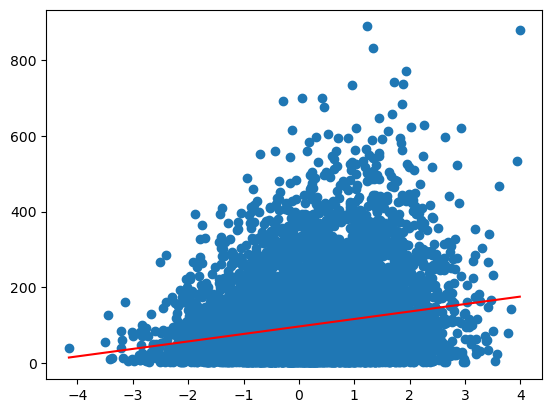

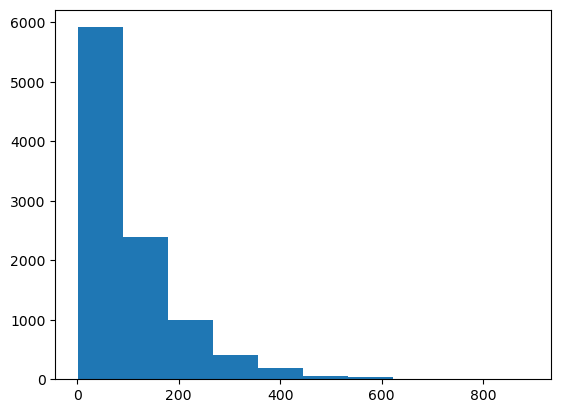

2


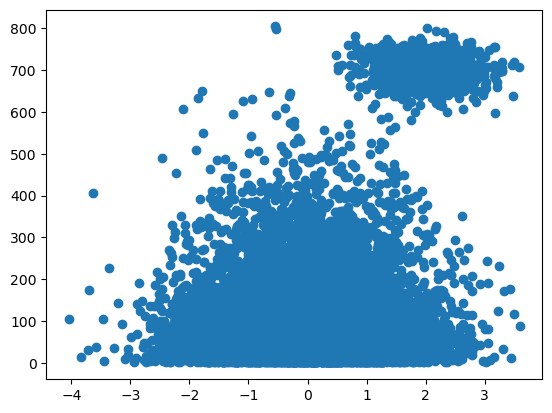

決定係数: 0.2045
傾き: 78.66840871679071
決定係数*傾き: 16.0873


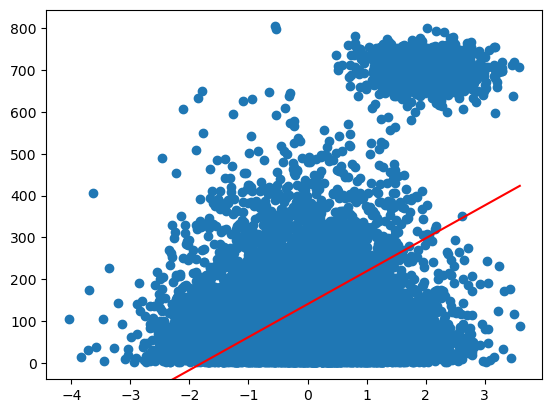

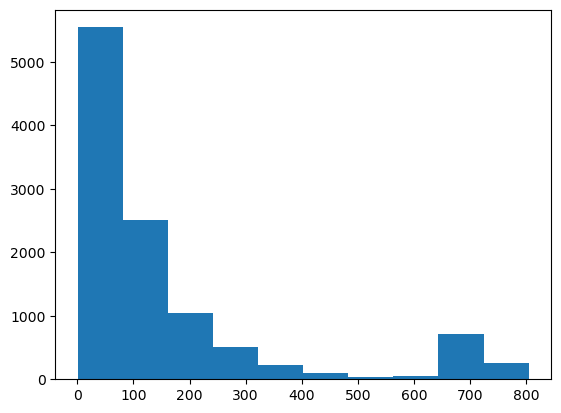

3


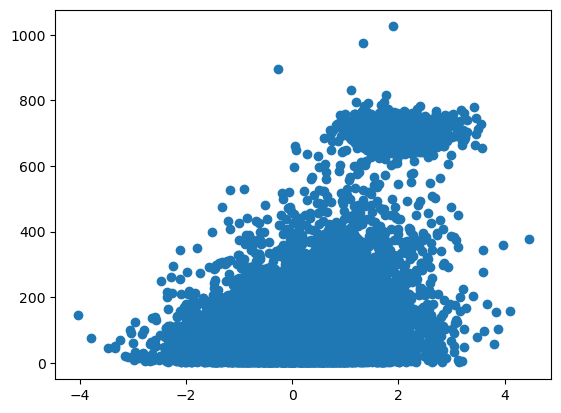

決定係数: 0.2527
傾き: 89.54088130830115
決定係数*傾き: 22.6231


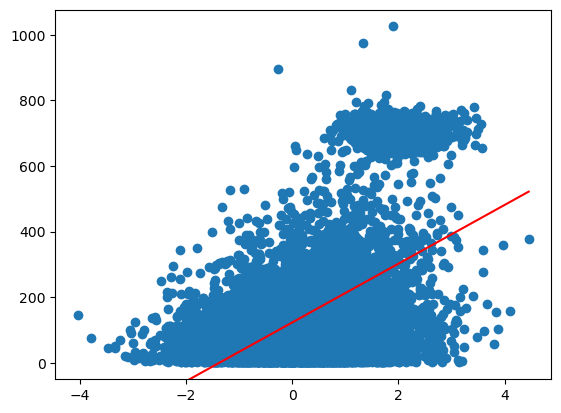

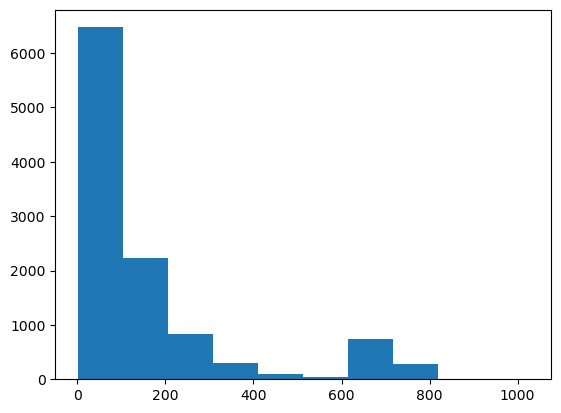

4


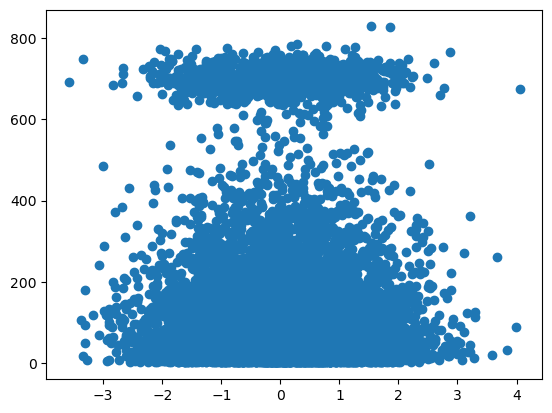

決定係数: 0.0000
傾き: -1.0483692354001581
決定係数*傾き: -0.0000


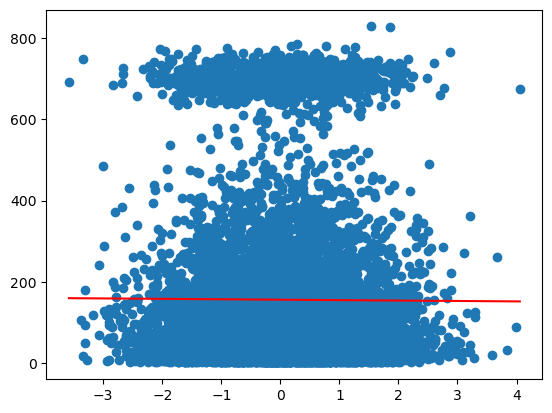

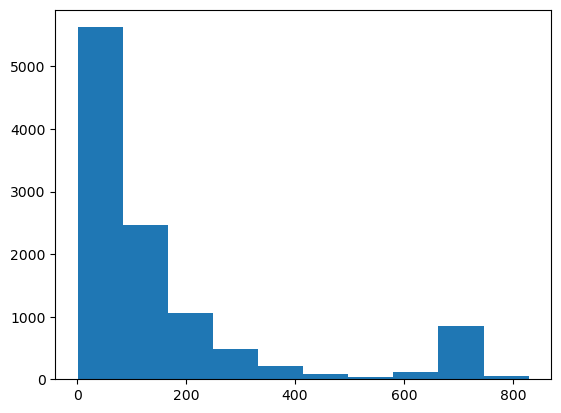

5


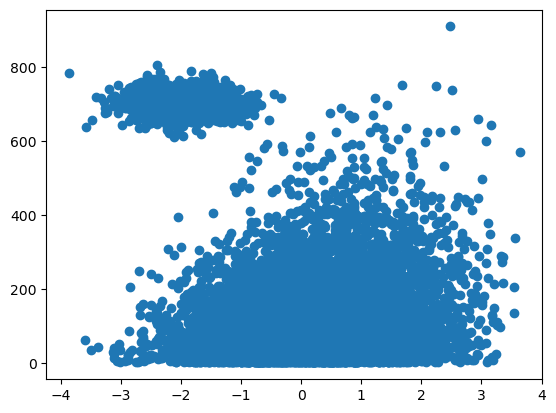

決定係数: 0.1512
傾き: -65.66944628288542
決定係数*傾き: -9.9303


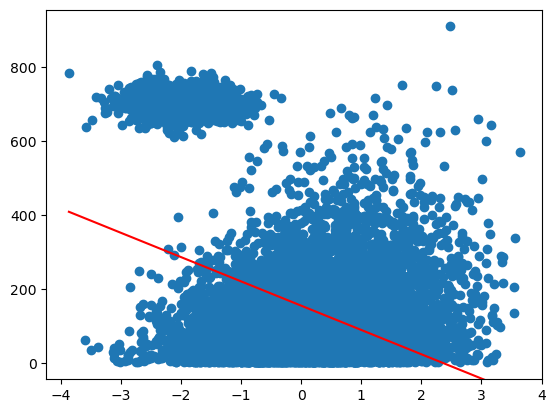

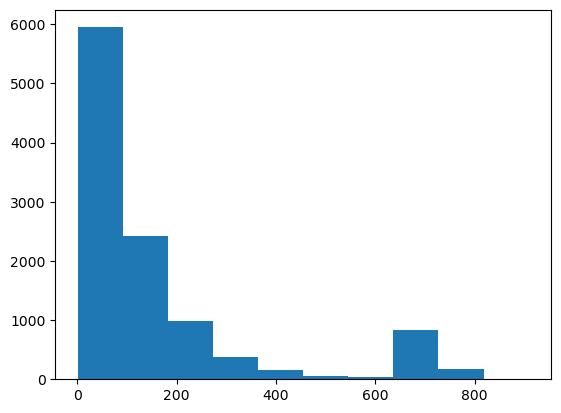

In [30]:
i = 0
for x, y in xys:
    print(i)
    draw_graph(x, y)
    i = i + 1

2.0


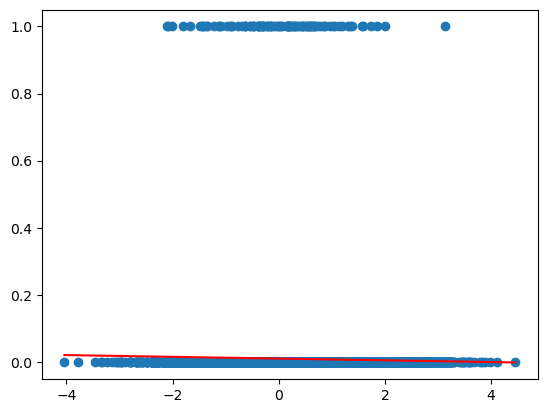

133.0


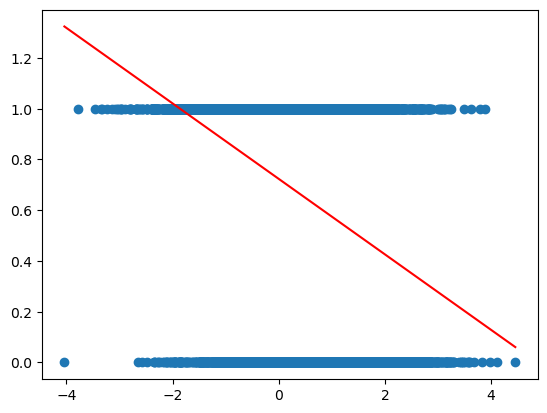

264.0


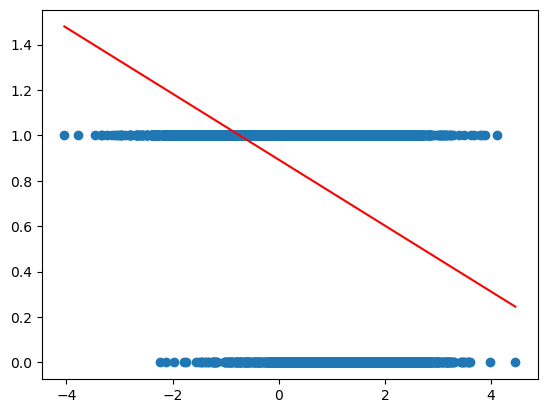

399.0


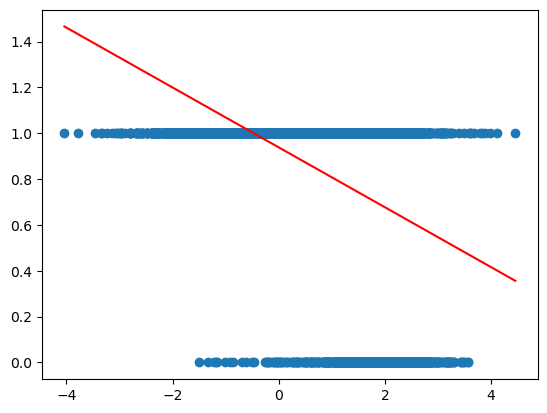

646.0


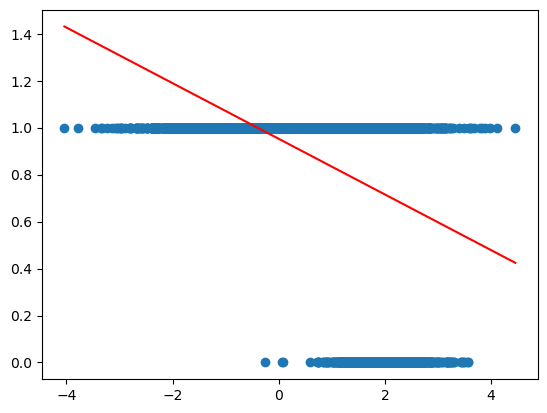

832.0


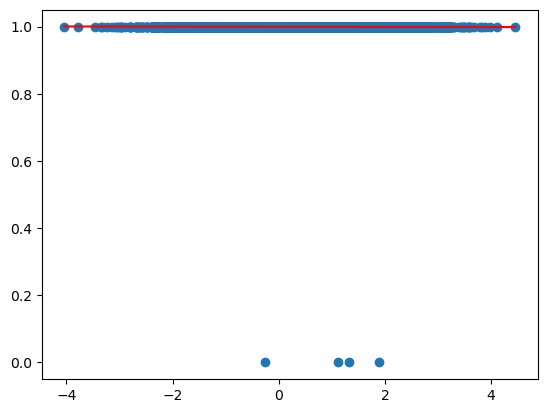

In [28]:
x, y = xys[3]
uniq = np.unique(np.floor(y))[1:]
#print(uniq)
for k in itertools.islice(uniq, 0, None, int(len(uniq)/5)):
    print(k)
    y_k = np.where(y < k, 1, 0)
    plt.scatter(x, y_k)

    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y_k)
    a = lr.coef_
    b = lr.intercept_
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = x_min*a + b
    y_max = x_max*a + b
    plt.plot([x_min, x_max], [y_min, y_max], c='red')

    plt.show()